# Original Dataset
* EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
# Read data from CSV
data_path = "/content/drive/MyDrive/099_Major Project/LLM_Labels.xlsx"  # Replace with the actual path to your CSV file
data_df = pd.read_excel(data_path)

In [ ]:
print("Number of rows and columns:", data_df.shape)

Number of rows and columns: (25572, 6)


In [ ]:
print("\nData types:", data_df.dtypes)


Data types: screen_name        object
text               object
account.type        int64
class_type         object
gemini_response    object
openAI_response    object
dtype: object


In [ ]:
print("\nMissing values:", data_df.isnull().sum())


Missing values: screen_name        0
text               0
account.type       0
class_type         0
gemini_response    0
openAI_response    0
dtype: int64


In [ ]:
# Summary statistics for 'account type'
print("\nSummary statistics for 'account type':")
print(data_df['account.type'].describe())


Summary statistics for 'account type':
count    25572.00000
mean         0.50000
std          0.50001
min          0.00000
25%          0.00000
50%          0.50000
75%          1.00000
max          1.00000
Name: account.type, dtype: float64


# Normalising LLM reponses

## Gemini Responses

In [ ]:
unique_values = data_df['gemini_response'].unique()

# Print or do whatever you want with the unique values
print(unique_values)

['AI' 'Foul language' 'Human' 'Cannot Say']


In [ ]:
unique_value_counts = data_df['gemini_response'].value_counts()
print(unique_value_counts)

gemini_response
AI               13603
Human             8312
Foul language     3500
Cannot Say         157
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
unique_value_counts = data_df['gemini_response'].value_counts()

# Convert the Series to a DataFrame
unique_value_counts_df = pd.DataFrame({'Unique_Values': unique_value_counts.index, 'Count': unique_value_counts.values})

# Save to Excel
unique_value_counts_df.to_excel('Gemini_unique_counts.xlsx', index=False)


Normalising labels that refer that tweet is AI generated to AI

In [ ]:
# import pandas as pd

# # Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
# # 'values_to_replace' is a list of unique values you want to replace
# values_to_replace = ['This passage was generated by an AI.','This passage appears to be generated by an AI due to the use of hashtags and the straightforward language used.',
#                      'Bot','It is difficult to determine whether the passage was generated by an AI or written by a human without more context. However, there are some clues that may help. The passage is relatively short and simple, and it uses some informal language, such as "Dr. Gamer" and "foul langauge." This suggests that it was written by a human, rather than an AI. Additionally, the passage does not contain any of the common errors that are often made by AIs, such as grammatical errors or nonsensical statements.',
#                      'This passage is incorrect. Russell Wilson is a quarterback, not a running back. This passage was likely generated by an AI.',
#                      'The passage is not complete, so it is difficult to determine whether it was generated by an AI or written by a human. However, the phrase "Every single in India" is not grammatically correct, which suggests that the passage may have been generated by an AI.',
#                      ]  # Add more values as needed
# # 'set_value' is the value you want to replace those unique values with
# set_value = 'AI'

# # Replace specific unique values with the set value
# data_df['gemini_response'] = data_df['gemini_response'].replace(values_to_replace, set_value)

# # Now the specified unique values in the 'gemini_response' column are replaced with the set value


Normalising labels that refer that tweet is Human generated to Human

In [ ]:
# import pandas as pd

# # Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
# # 'values_to_replace' is a list of unique values you want to replace
# values_to_replace = ['This passage is most likely written by a human. It contains opinions and a tone that is typical of human writing.',
#                      'The passage is not generated by an AI. It is written by a human.',
#                      'This passage is not generated by an AI, it is written by a human.',
#                      ]  # Add more values as needed
# # 'set_value' is the value you want to replace those unique values with
# set_value = 'Human'

# # Replace specific unique values with the set value
# data_df['gemini_response'] = data_df['gemini_response'].replace(values_to_replace, set_value)

# # Now the specified unique values in the 'gemini_response' column are replaced with the set value


Normalising labels tweets that can't be classified as Can't Label

In [ ]:
# import pandas as pd

# # Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
# # 'values_to_replace' is a list of unique values you want to replace
# values_to_replace = ['Spam message','I do not have access to the internet, therefore I can not access the URL and classify the passage.']  # Add more values as needed
# # 'set_value' is the value you want to replace those unique values with
# set_value = 'Cannot Say'

# # Replace specific unique values with the set value
# data_df['gemini_response'] = data_df['gemini_response'].replace(values_to_replace, set_value)

# # Now the specified unique values in the 'gemini_response' column are replaced with the set value


In [ ]:
data_df.to_excel('/content/drive/MyDrive/099_Major Project/LLM_Labels.xlsx', index=False)

## OpenAI Responses

In [ ]:
unique_values = data_df['openAI_response'].unique()

# Print or do whatever you want with the unique values
print(unique_values)

['AI' 'Human' 'Foul language' 'Cannot Say']


In [ ]:
unique_value_counts = data_df['openAI_response'].value_counts()
print(unique_value_counts)

openAI_response
AI               16075
human             8914
foul language      483
Cannot Say         100
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
unique_value_counts = data_df['openAI_response'].value_counts()

# Convert the Series to a DataFrame
unique_value_counts_df = pd.DataFrame({'Unique_Values': unique_value_counts.index, 'Count': unique_value_counts.values})

# Save to Excel
unique_value_counts_df.to_excel('/content/drive/MyDrive/099_Major Project/OpenAI/openAI.xlsx', index=False)


Normalising labels that refer that tweet is AI generated to AI

In [ ]:
import pandas as pd

# Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
# 'values_to_replace' is a list of unique values you want to replace
values_to_replace = ['ai-generated','ai generated','ai','technology/news','technology/computers',
                     'technology/programming','technology/computing','technology/entertainment',
                     'technology/software','technology/marketing','technology/shopping','technology/comparison',
                     'technology/informational','technology/cloud computing','technology/science',
                     'technology/video games','technology/economics','ai/technology','technology/artificial intelligence',
                     'ai-generated content','technology/software news','technology','technology/robotics','technology/it',
                     'technology/market trends','technology news/article','technology/security','c) this passage was most likely generated by an ai.']  # Add more values as needed
# 'set_value' is the value you want to replace those unique values with
set_value = 'AI'

# Replace specific unique values with the set value
data_df['openAI_response'] = data_df['openAI_response'].replace(values_to_replace, set_value)

# Now the specified unique values in the 'gemini_response' column are replaced with the set value


Normalising labels that refer that tweet is Human generated to Human

In [ ]:
import pandas as pd

# Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
# 'values_to_replace' is a list of unique values you want to replace
values_to_replace = ['human','human-written','human-generated','negative sentiment, potentially written by a human.',
                     'human beings and dinosaurs share many similarities, despite the fact that they existed millions of years apart. both species were dominant in their respective eras, with advanced physical abilities and complex social structures. additionally, both humans and dinosaurs have a strong instinct for survival and have adapted to changing environments. these similarities suggest that, despite the vast differences in appearance, humans and dinosaurs are fundamentally the same at their core.',
                     'this passage does not contain any foul language and appears to be discussing a theory. it is likely written by a human.',
                     'human interest/pop culture','this passage appears to be a patent number, specifically for us patent number 6506148, which was granted in 2003. it is likely written by a human, as it is a technical document related to intellectual property.',
                     'human psychology/philosophy','human rights/political','']  # Add more values as needed
# 'set_value' is the value you want to replace those unique values with
set_value = 'Human'

# Replace specific unique values with the set value
data_df['openAI_response'] = data_df['openAI_response'].replace(values_to_replace, set_value)

# Now the specified unique values in the 'gemini_response' column are replaced with the set value


Normalising labels that refer that tweet is toxic to Foul language

In [ ]:
import pandas as pd

# Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
# 'values_to_replace' is a list of unique values you want to replace
values_to_replace = ['foul language','negative sentiment','negative','negative',
                     'negative/insulting','negative/aggressive','negative/insult',
                     'offensive','negative/offensive','inappropriate/offensive','toxic/aggressive',
                     'violent/aggressive','negative/political','negative/opinionated','negative/disapproving',
                     'offensive language','negative/disrespectful','offensive/insulting','toxic/hateful',
                     'toxic/offensive','negative/sexist','violent/graphic','aggressive/threatening','toxic or offensive language.',
                     'profanity','toxic/inappropriate','toxic and offensive language.','negative/dismissive',
                     'offensive/threatening','negative and potentially offensive language.','negative/complaint',
                     'negative/warning','obscene language','threatening or aggressive.','erotic','negative/threatening',
                     'inappropriate/explicit content','c-list: shit i yell in the car with the windows rolled up',
                     'adult content','negative/insecure','profanity/inappropriate language','conspiracy theory',
                     'negative/profanity','toxic and derogatory language','offensive/aggressive','negative/complaining',
                     'inappropriate behavior','violent/threatening','violent/threatening','negative emotion',
                     'racial','nsp: sexual content','negative political statement','offensive/inappropriate','slang/informal','spam message',
                     'humor/slang','erotic content','offside and sarcastic comment about salah.',
                     'negative opinion','offensive/insult']  # Add more values as needed
# 'set_value' is the value you want to replace those unique values with
set_value = 'Foul language'

# Replace specific unique values with the set value
data_df['openAI_response'] = data_df['openAI_response'].replace(values_to_replace, set_value)

# Now the specified unique values in the 'gemini_response' column are replaced with the set value


Normalising labels tweets that can't be classified as Can't Label

In [ ]:
import pandas as pd

# Assuming 'data_df' is your DataFrame and 'gemini_response' is the name of the column containing strings
# 'values_to_replace' is a list of unique values you want to replace
values_to_replace = ['unclassified','unclassifiable','unclear/incomplete','not enough information to classify.',
                     'irrelevant','this passage does not contain any text, so it cannot be classified as either ai-generated or human-written. it is simply a placeholder for a picture.',
                     'this passage does not contain any text, so it cannot be classified as either ai-generated or human-written. it is simply a placeholder for a picture.',
                     'political','political propaganda','humor','unclear/incomplete','not enough information to classify.',
                     'neutral','music/entertainment','feeling: positive','humorous/personal experience','opinion',
                     'a) side projects','political rhetoric','irrelevant','emotion/expression','this passage does not contain any text, so it cannot be classified as either ai-generated or human-written. it is simply a placeholder for a picture.',
                     'entertainment/news','humor/comedy',
                     'rating','humor/satire','music/playlist','humorous','e i e i o','not applicable.','strstring']  # Add more values as needed
# 'set_value' is the value you want to replace those unique values with
set_value = 'Cannot Say'

# Replace specific unique values with the set value
data_df['openAI_response'] = data_df['openAI_response'].replace(values_to_replace, set_value)

# Now the specified unique values in the 'gemini_response' column are replaced with the set value


Replacing nan values

In [ ]:
import pandas as pd

# Assuming 'data_df' is your DataFrame and 'openAI_response' is the name of the column containing strings
# Replace 'nan_value' with the desired value you want to use for replacing NaN
nan_value_replacement = 'Cannot Say'

# Replace NaN values in the 'openAI_response' column with the desired value
data_df['openAI_response'] = data_df['openAI_response'].fillna(nan_value_replacement)

# Now the NaN values in the 'openAI_response' column are replaced with the desired value


In [ ]:
data_df.to_excel('/content/drive/MyDrive/099_Major Project/LLM_Labels.xlsx', index=False)

#Evaluation of Results

## Accuracy, Precision, Recall, F1 Score
* **Accuracy :**  Accuracy answers the question “Out of all the predictions we made, how many were true?”

* **Precision :** It answers the question “Out of all the positive predictions we made, how many were true?”

* **Recall :** Recall is also called true positive rate and answers the question “Out of all the data points that should be predicted as true, how many did we correctly predict as true?”

* **F1-Score :** F1 Score is a measure that combines recall and precision. As we have seen there is a trade-off between precision and recall, F1 can therefore be used to measure how effectively our models make that trade-off.

## GEMINI LLM by GOOGLE

### Strategy 1: Exclude 'Foul Language' and 'Cannot Say'

Excluding both categories and keeping a count of many tweets were excluded

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'gemini_response' column
# Filter out tweets labeled as 'Foul language' and 'Cannot say' by Gemini
filtered_data_df = data_df[~data_df['gemini_response'].isin(['Foul language', 'Cannot Say'])].copy()

# Create a dictionary to map the remaining two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the remaining categories to binary labels using .loc
filtered_data_df.loc[:, 'gemini_response_binary'] = filtered_data_df['gemini_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
gemini_predictions = filtered_data_df['gemini_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, gemini_predictions)

# Calculate precision
precision = precision_score(ground_truth, gemini_predictions)

# Calculate recall
recall = recall_score(ground_truth, gemini_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, gemini_predictions)

print("Gemini Model Performance for Binary Classification (Scenario 1 - excluding 'Foul language' and 'Cannot Say' tweets):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calculate count of excluded tweets
excluded_tweets_count = len(data_df[data_df['gemini_response'].isin(['Foul language', 'Cannot Say'])])
print(f"Number of excluded tweets: {excluded_tweets_count}")


Gemini Model Performance for Binary Classification (Scenario 1 - excluding 'Foul language' and 'Cannot Say' tweets):
Accuracy: 0.6308464522016883
Precision: 0.6031757700507241
Recall: 0.7529595301459118
F1-score: 0.6697959183673469
Number of excluded tweets: 3657


* **Accuracy:** The Gemini model achieved an accuracy of approximately 63%, indicating the proportion of correctly classified tweets compared to the total number of tweets, excluding those labeled as 'Foul language' and 'Cannot Say'.

* **Precision:** Precision of around 60% suggests that when the model predicts a tweet as AI-generated, it is correct about 60% of the time.

* **Recall:** The recall value of about 75% indicates the proportion of AI-generated tweets that were correctly identified by the model out of all actual AI-generated tweets.

* **F1-score:** The F1-score, which balances precision and recall, is approximately 0.67, implying overall good performance in binary classification, considering both false positives and false negatives.

* **Excluded Tweets:** A substantial number of tweets, totaling 3657, were excluded from evaluation due to being labeled as 'Foul language' or 'Cannot Say' by the Gemini model.

### Strategy 2: Mapping 'Foul language' as Human and 'Cannot Say' as AI
Cosnidering AI rarely generates foul or toxic texts unless trained so and cannot say category as AI.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'gemini_response' column
# Filter out tweets labeled as 'Foul language' and 'Cannot say' by Gemini
filtered_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
filtered_data_df.loc[filtered_data_df['gemini_response'] == 'Foul language', 'gemini_response'] = 'Human'
filtered_data_df.loc[filtered_data_df['gemini_response'] == 'Cannot Say', 'gemini_response'] = 'AI'

# Create a dictionary to map the two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the categories to binary labels
filtered_data_df['gemini_response_binary'] = filtered_data_df['gemini_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
gemini_predictions = filtered_data_df['gemini_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, gemini_predictions)

# Calculate precision
precision = precision_score(ground_truth, gemini_predictions)

# Calculate recall
recall = recall_score(ground_truth, gemini_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, gemini_predictions)

print("Gemini Model Performance for Binary Classification (Scenario 2 - 'Foul language' as 'Human' and 'Cannot Say' as 'AI'):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Gemini Model Performance for Binary Classification (Scenario 2 - 'Foul language' as 'Human' and 'Cannot Say' as 'AI'):
Accuracy: 0.6080869701235727
Precision: 0.6004360465116279
Recall: 0.646175504458001
F1-score: 0.6224666616439389


* **Accuracy:** The model achieved an accuracy of approximately 60.81%, indicating the proportion of correctly classified tweets compared to the total number of tweets after mapping 'Foul language' and 'Cannot Say'.

* **Precision:** Precision of around 60.04% suggests that when the model predicts a tweet as AI-generated, it is correct about 60.04% of the time.

* **Recall:** The recall value of approximately 64.62% indicates the proportion of AI-generated tweets that were correctly identified by the model out of all actual AI-generated tweets.

* **F1-score:** The F1-score, which balances precision and recall, is approximately 0.62, implying overall moderate performance in binary classification, considering both false positives and false negatives.

Overall, while mapping 'Foul language' as 'Human' and 'Cannot Say' as 'AI' slightly improved the recall compared to the previous scenario, it resulted in a lower accuracy and F1-score. This suggests that this mapping strategy might not be optimal for the Gemini model's performance in this context.

### Strategy 3: Mapping 'Foul language' as AI and 'Cannot Say' as Human
Swapping the mapping and evaluating the performance of Gemini LLM

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'gemini_response' column
# Filter out tweets labeled as 'Foul language' and 'Cannot say' by Gemini
filtered_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
filtered_data_df.loc[filtered_data_df['gemini_response'] == 'Foul language', 'gemini_response'] = 'AI'
filtered_data_df.loc[filtered_data_df['gemini_response'] == 'Cannot Say', 'gemini_response'] = 'Human'

# Create a dictionary to map the two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the categories to binary labels
filtered_data_df['gemini_response_binary'] = filtered_data_df['gemini_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
gemini_predictions = filtered_data_df['gemini_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, gemini_predictions)

# Calculate precision
precision = precision_score(ground_truth, gemini_predictions)

# Calculate recall
recall = recall_score(ground_truth, gemini_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, gemini_predictions)

print("Gemini Model Performance for Binary Classification (Scenario 3 - 'Foul language' as 'AI' and 'Cannot Say' as 'Human'):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Gemini Model Performance for Binary Classification (Scenario 3 - 'Foul language' as 'AI' and 'Cannot Say' as 'Human'):
Accuracy: 0.6161817613014234
Precision: 0.5868561071157107
Recall: 0.7849992178945722
F1-score: 0.6716183211214828


* **Accuracy:** The model achieved an accuracy of approximately 61.62%, indicating the proportion of correctly classified tweets compared to the total number of tweets after mapping 'Foul language' and 'Cannot Say'.

* **Precision:** Precision of around 58.69% suggests that when the model predicts a tweet as AI-generated, it is correct about 58.69% of the time.

* **Recall:** The recall value of approximately 78.50% indicates the proportion of AI-generated tweets that were correctly identified by the model out of all actual AI-generated tweets.

* **F1-score:** The F1-score, which balances precision and recall, is approximately 0.67, implying overall good performance in binary classification, considering both false positives and false negatives.

Compared to Scenario 2, where 'Foul language' was mapped as 'Human' and 'Cannot Say' as 'AI', this scenario shows a higher recall but slightly lower precision. Overall, this mapping strategy appears to have improved the recall while maintaining a reasonable level of precision.

### Strategy 4: Mapping 'Foul language' and 'Cannot Say' both as Human

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'gemini_response' column
# Filter out tweets labeled as 'Foul language' and 'Cannot say' by Gemini
filtered_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
filtered_data_df.loc[filtered_data_df['gemini_response'] == 'Foul language', 'gemini_response'] = 'Human'
filtered_data_df.loc[filtered_data_df['gemini_response'] == 'Cannot Say', 'gemini_response'] = 'Human'

# Create a dictionary to map the two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the categories to binary labels
filtered_data_df['gemini_response_binary'] = filtered_data_df['gemini_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
gemini_predictions = filtered_data_df['gemini_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, gemini_predictions)

# Calculate precision
precision = precision_score(ground_truth, gemini_predictions)

# Calculate recall
recall = recall_score(ground_truth, gemini_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, gemini_predictions)

print("Gemini Model Performance for Binary Classification (Scenario 4 - 'Foul language' and 'Cannot Say' both as 'Human'):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Gemini Model Performance for Binary Classification (Scenario 4 - 'Foul language' and 'Cannot Say' both as 'Human'):
Accuracy: 0.6097684967933678
Precision: 0.6031757700507241
Recall: 0.6417175035194744
F1-score: 0.6218500132631021


* **Accuracy:** Represents the proportion of correctly classified tweets compared to the total number of tweets, yielding a rate of approximately 60.98%.

* **Precision:** Indicates that around 60.32% of the tweets classified as AI-generated were actually AI-generated among all predicted AI-generated tweets.

* **Recall:** Reflects the ability of the model to identify approximately 64.17% of all AI-generated tweets out of the actual AI-generated tweets.

* **F1-score:** Balances precision and recall, resulting in an overall performance score of approximately 62.19%, considering both false positives and false negatives.

### Strategy 5: Mapping 'Foul language' and 'Cannot Say' both as AI

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'gemini_response' column
# Filter out tweets labeled as 'Foul language' and 'Cannot say' by Gemini
filtered_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
filtered_data_df.loc[filtered_data_df['gemini_response'] == 'Foul language', 'gemini_response'] = 'AI'
filtered_data_df.loc[filtered_data_df['gemini_response'] == 'Cannot Say', 'gemini_response'] = 'AI'

# Create a dictionary to map the two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the categories to binary labels
filtered_data_df['gemini_response_binary'] = filtered_data_df['gemini_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
gemini_predictions = filtered_data_df['gemini_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, gemini_predictions)

# Calculate precision
precision = precision_score(ground_truth, gemini_predictions)

# Calculate recall
recall = recall_score(ground_truth, gemini_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, gemini_predictions)

print("Gemini Model Performance for Binary Classification (Scenario 5 - 'Foul language' and 'Cannot Say' both as 'AI'):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Gemini Model Performance for Binary Classification (Scenario 5 - 'Foul language' and 'Cannot Say' both as 'AI'):
Accuracy: 0.6145002346316284
Precision: 0.5848203939745076
Recall: 0.7894572188330987
F1-score: 0.6719030819410239


* **Accuracy:** Achieved an accuracy of approximately 61.45%, indicating the proportion of correctly classified tweets compared to the total number of tweets.

* **Precision:** Around 58.48% of the tweets classified as AI-generated were actually AI-generated among all predicted AI-generated tweets.

* **Recall:** Successfully identified approximately 78.95% of all AI-generated tweets out of the actual AI-generated tweets.

* **F1-score:** Balanced precision and recall, resulting in an overall performance score of approximately 67.19%, considering both false positives and false negatives.

### Comparing all scenarios

In [ ]:
import pandas as pd

# Create a dictionary to store scenario names and their performance metrics
data = {
    'Scenario': ['Scenario 1', 'Scenario 2', 'Scenario 3', 'Scenario 4', 'Scenario 5'],
    'Accuracy': [0.6308, 0.6081, 0.6162, 0.6098, 0.6145],
    'Precision': [0.6032, 0.6004, 0.5869, 0.6032, 0.5848],
    'Recall': [0.7530, 0.6462, 0.7850, 0.6417, 0.7895],
    'F1-score': [0.6698, 0.6225, 0.6716, 0.6219, 0.6719]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Scenario' column as the index
df.set_index('Scenario', inplace=True)

# Print the DataFrame
print(df)


            Accuracy  Precision  Recall  F1-score
Scenario                                         
Scenario 1    0.6308     0.6032  0.7530    0.6698
Scenario 2    0.6081     0.6004  0.6462    0.6225
Scenario 3    0.6162     0.5869  0.7850    0.6716
Scenario 4    0.6098     0.6032  0.6417    0.6219
Scenario 5    0.6145     0.5848  0.7895    0.6719


Based on the provided table comparing the model performance across different scenarios, we can make the following observations:

* **Accuracy:** The accuracy values range from approximately 60.81% to 63.08%. Scenario 1 achieved the highest accuracy, while Scenario 2 had the lowest.

* **Precision:** Precision values range from approximately 58.48% to 60.32%. Scenario 1 had the highest precision, while Scenario 5 had the lowest.

* **Recall:** Recall values vary between approximately 64.62% and 78.95%. Scenario 5 achieved the highest recall, while Scenario 2 had the lowest.

* **F1-score:** F1-scores range from approximately 62.19% to 67.19%. Scenario 5 and Scenario 3 had the highest F1-scores, while Scenario 2 had the lowest.

Overall, Scenario 3 and Scenario 5 appear to perform relatively better compared to other scenarios, as they have higher recall and F1-scores. However, the choice of the optimal scenario depends on specific priorities and objectives, such as emphasizing precision or recall, or finding a balance between them.

## GPT-3.5 Turbo LLM by OpenAI

### Strategy 1: Exclude 'Foul Language' and 'Cannot Say'

Excluding both categories and keeping a count of many tweets were excluded

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'openAI_response' column
filtered_data_df = data_df[~data_df['openAI_response'].isin(['Foul language', 'Cannot Say'])].copy()

# Create a dictionary to map the remaining two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the remaining categories to binary labels using .loc
filtered_data_df.loc[:, 'openAI_response_binary'] = filtered_data_df['openAI_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
openAI_predictions = filtered_data_df['openAI_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, openAI_predictions)

# Calculate precision
precision = precision_score(ground_truth, openAI_predictions)

# Calculate recall
recall = recall_score(ground_truth, openAI_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, openAI_predictions)

print("GPT-3.5 Model Performance for Binary Classification (Scenario 1 - excluding 'Foul language' and 'Cannot Say' tweets):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Calculate count of excluded tweets
excluded_tweets_count = len(data_df[data_df['openAI_response'].isin(['Foul language', 'Cannot Say'])])
print(f"Number of excluded tweets: {excluded_tweets_count}")


GPT-3.5 Model Performance for Binary Classification (Scenario 1 - excluding 'Foul language' and 'Cannot Say' tweets):
Accuracy: 0.5899795910200488
Precision: 0.5716329704510109
Recall: 0.7322495816399713
F1-score: 0.6420486305198435
Number of excluded tweets: 583


* **Accuracy:** The GPT-3.5 model achieved an accuracy of approximately 59%, indicating the proportion of correctly classified tweets (excluding 'Foul language' and 'Cannot Say' tweets) compared to all tweets.

* **Precision:** With a precision of around 57%, the GPT-3.5 model correctly identified AI-generated tweets among the subset of tweets it classified as AI-generated.

* **Recall:** The model demonstrated a recall of about 73%, capturing the proportion of AI-generated tweets correctly identified among all actual AI-generated tweets (excluding 'Foul language' and 'Cannot Say' tweets).

* **F1-score:** Achieving an F1-score of approximately 64%, the GPT-3.5 model showed a balance between precision and recall, considering both false positives and false negatives.

* **Excluded Tweets:** 583 tweets labeled as 'Foul language' or 'Cannot Say' by the GPT-3.5 model were excluded from the evaluation.

### Strategy 2: Mapping 'Foul language' as Human and 'Cannot Say' as AI
Cosnidering AI rarely generates foul or toxic texts unless trained so and cannot say category as human.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'openAI_response' column
filtered_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
filtered_data_df.loc[filtered_data_df['openAI_response'] == 'Foul language', 'openAI_response'] = 'Human'
filtered_data_df.loc[filtered_data_df['openAI_response'] == 'Cannot Say', 'openAI_response'] = 'AI'

# Create a dictionary to map the two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the categories to binary labels
filtered_data_df['openAI_response_binary'] = filtered_data_df['openAI_response'].map(category_mapping)



# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
openAI_predictions = filtered_data_df['openAI_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, openAI_predictions)

# Calculate precision
precision = precision_score(ground_truth, openAI_predictions)

# Calculate recall
recall = recall_score(ground_truth, openAI_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, openAI_predictions)

print("GPT-3.5 turbo Model Performance for Binary Classification (Scenario 2 - 'Foul language' as 'Human' and 'Cannot Say' as 'AI'):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


GPT-3.5 turbo Model Performance for Binary Classification (Scenario 2 - 'Foul language' as 'Human' and 'Cannot Say' as 'AI'):
Accuracy: 0.5907633348975442
Precision: 0.5717465224111283
Recall: 0.7232910996402315
F1-score: 0.6386519802493008


* **Accuracy:** The GPT-3.5 turbo model achieved an accuracy of approximately 59%, indicating the proportion of correctly classified tweets (considering 'Foul language' as 'Human' and 'Cannot Say' as 'AI') compared to all tweets.

* **Precision:** With a precision of around 57%, the GPT-3.5 turbo model correctly identified AI-generated tweets among the subset of tweets it classified as AI-generated.

* **Recall:** The model demonstrated a recall of about 72%, capturing the proportion of AI-generated tweets correctly identified among all actual AI-generated tweets (considering 'Foul language' as 'Human' and 'Cannot Say' as 'AI').

* **F1-score:** Achieving an F1-score of approximately 64%, the GPT-3.5 turbo model showed a balance between precision and recall, considering both false positives and false negatives.

### Strategy 3: Mapping 'Foul language' as AI and 'Cannot Say' as Human

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'gemini_response' column
# Filter out tweets labeled as 'Foul language' and 'Cannot say' by openAI
filtered_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
filtered_data_df.loc[filtered_data_df['openAI_response'] == 'Foul language', 'openAI_response'] = 'AI'
filtered_data_df.loc[filtered_data_df['openAI_response'] == 'Cannot Say', 'openAI_response'] = 'Human'

# Create a dictionary to map the two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the categories to binary labels
filtered_data_df['openAI_response_binary'] = filtered_data_df['openAI_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
openAI_predictions = filtered_data_df['openAI_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, openAI_predictions)

# Calculate precision
precision = precision_score(ground_truth, openAI_predictions)

# Calculate recall
recall = recall_score(ground_truth, openAI_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, openAI_predictions)

print("GPT-3.5 turbo Model Performance for Binary Classification (Scenario 3 - 'Foul language' as 'AI' and 'Cannot Say' as 'Human'):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


GPT-3.5 turbo Model Performance for Binary Classification (Scenario 3 - 'Foul language' as 'AI' and 'Cannot Say' as 'Human'):
Accuracy: 0.5850930705459096
Precision: 0.5657084188911704
Recall: 0.7325981542311903
F1-score: 0.6384269356597599


* **Accuracy (59%):** The accuracy represents the proportion of correctly classified tweets (considering 'Foul language' as 'AI' and 'Cannot Say' as 'Human') compared to all tweets. Despite the specific categorization of 'Foul language' and 'Cannot Say', the model correctly classified approximately 59% of the tweets.

* **Precision (57%):** Precision indicates the proportion of correctly identified AI-generated tweets among the subset of tweets classified as AI-generated. With a precision of around 57%, the model correctly identified AI-generated tweets among those it categorized as such, while minimizing false positives.

* **Recall (73%):** Recall measures the proportion of AI-generated tweets correctly identified among all actual AI-generated tweets. The model demonstrated a recall of approximately 73%, capturing the majority of AI-generated tweets in the dataset.

* **F1-score (64%):** The F1-score provides a balance between precision and recall, considering both false positives and false negatives. With an F1-score of about 64%, the GPT-3.5 turbo model exhibited a reasonable balance between precision and recall, indicating its effectiveness in binary classification under Scenario 3's categorization scheme.

### Strategy 4: Mapping 'Foul language' and 'Cannot Say' both as Human

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'gemini_response' column
# Filter out tweets labeled as 'Foul language' and 'Cannot say' by openAI
filtered_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
filtered_data_df.loc[filtered_data_df['openAI_response'] == 'Foul language', 'openAI_response'] = 'Human'
filtered_data_df.loc[filtered_data_df['openAI_response'] == 'Cannot Say', 'openAI_response'] = 'Human'

# Create a dictionary to map the two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the categories to binary labels
filtered_data_df['openAI_response_binary'] = filtered_data_df['openAI_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
openAI_predictions = filtered_data_df['openAI_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, openAI_predictions)

# Calculate precision
precision = precision_score(ground_truth, openAI_predictions)

# Calculate recall
recall = recall_score(ground_truth, openAI_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, openAI_predictions)

print("GPT-3.5 turbo Model Performance for Binary Classification (Scenario 4 - 'Foul language' and 'Cannot Say' both as 'Human'):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


GPT-3.5 turbo Model Performance for Binary Classification (Scenario 4 - 'Foul language' and 'Cannot Say' both as 'Human'):
Accuracy: 0.5900594400125136
Precision: 0.5716329704510109
Recall: 0.7186766776161426
F1-score: 0.6367762724784312


* **Accuracy (59%)**: The accuracy represents the proportion of correctly classified tweets (with both 'Foul language' and 'Cannot Say' categorized as 'Human') compared to all tweets. The model correctly classified approximately 59% of the tweets.

* **Precision (57%):** Precision indicates the proportion of correctly identified AI-generated tweets among the subset of tweets classified as AI-generated. With a precision of around 57%, the model correctly identified AI-generated tweets among those it categorized as such, while minimizing false positives.

* **Recall (72%):** Recall measures the proportion of AI-generated tweets correctly identified among all actual AI-generated tweets. The model demonstrated a recall of approximately 72%, capturing the majority of AI-generated tweets in the dataset.

* **F1-score (64%):** The F1-score provides a balance between precision and recall, considering both false positives and false negatives. With an F1-score of about 64%, the GPT-3.5 turbo model exhibited a reasonable balance between precision and recall, indicating its effectiveness in binary classification under Scenario 4's categorization scheme.

### Strategy 5: Mapping 'Foul language' and 'Cannot Say' both as AI

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'data_df' is your DataFrame containing the 'gemini_response' column
# Filter out tweets labeled as 'Foul language' and 'Cannot say' by openAI
filtered_data_df = data_df.copy()  # Make a copy to avoid modifying the original DataFrame
filtered_data_df.loc[filtered_data_df['openAI_response'] == 'Foul language', 'openAI_response'] = 'AI'
filtered_data_df.loc[filtered_data_df['openAI_response'] == 'Cannot Say', 'openAI_response'] = 'AI'

# Create a dictionary to map the two categories to binary labels
category_mapping = {
    'AI': 1,  # AI-generated
    'Human': 0  # Human
}

# Map the categories to binary labels
filtered_data_df['openAI_response_binary'] = filtered_data_df['openAI_response'].map(category_mapping)

# Assuming you have the ground truth labels stored in 'account.type' column
ground_truth = filtered_data_df['account.type']
openAI_predictions = filtered_data_df['openAI_response_binary']

# Calculate accuracy
accuracy = accuracy_score(ground_truth, openAI_predictions)

# Calculate precision
precision = precision_score(ground_truth, openAI_predictions)

# Calculate recall
recall = recall_score(ground_truth, openAI_predictions)

# Calculate F1-score
f1 = f1_score(ground_truth, openAI_predictions)

print("GPT-3.5 Turbo Model Performance for Binary Classification (Scenario 5 - 'Foul language' and 'Cannot Say' both as 'AI'):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


GPT-3.5 Turbo Model Performance for Binary Classification (Scenario 5 - 'Foul language' and 'Cannot Say' both as 'AI'):
Accuracy: 0.5857969654309401
Precision: 0.5658542442069876
Recall: 0.7372125762552793
F1-score: 0.6402662681700856


* **Accuracy (59%):** The accuracy represents the proportion of correctly classified tweets (with both 'Foul language' and 'Cannot Say' categorized as 'AI') compared to all tweets. The model correctly classified approximately 59% of the tweets.

* **Precision (57%):** Precision indicates the proportion of correctly identified AI-generated tweets among the subset of tweets classified as AI-generated. With a precision of around 57%, the model correctly identified AI-generated tweets among those it categorized as such, while minimizing false positives.

* **Recall (74%):** Recall measures the proportion of AI-generated tweets correctly identified among all actual AI-generated tweets. The model demonstrated a recall of approximately 74%, capturing the majority of AI-generated tweets in the dataset.

* **F1-score (64%): **The F1-score provides a balance between precision and recall, considering both false positives and false negatives. With an F1-score of about 64%, the GPT-3.5 Turbo model exhibited a reasonable balance between precision and recall, indicating its effectiveness in binary classification under Scenario 5's categorization scheme.

### Comparing all scenarios

In [ ]:
import pandas as pd

# Define the data for each scenario
data = {
    'Scenario': [1, 2, 3, 4, 5],
    'Accuracy': [0.5899795910200488, 0.5907633348975442, 0.5850930705459096, 0.5900594400125136, 0.5857969654309401],
    'Precision': [0.5716329704510109, 0.5717465224111283, 0.5657084188911704, 0.5716329704510109, 0.5658542442069876],
    'Recall': [0.7322495816399713, 0.7232910996402315, 0.7325981542311903, 0.7186766776161426, 0.7372125762552793],
    'F1-score': [0.6420486305198435, 0.6386519802493008, 0.6384269356597599, 0.6367762724784312, 0.6402662681700856]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set Scenario as index
df.set_index('Scenario', inplace=True)

# Display the DataFrame
print(df)


          Accuracy  Precision    Recall  F1-score
Scenario                                         
1         0.589980   0.571633  0.732250  0.642049
2         0.590763   0.571747  0.723291  0.638652
3         0.585093   0.565708  0.732598  0.638427
4         0.590059   0.571633  0.718677  0.636776
5         0.585797   0.565854  0.737213  0.640266


# Comparison between the two

A grouped bar chart to compare Gemini and OpenAI responses with each other and the ground truth for each category.

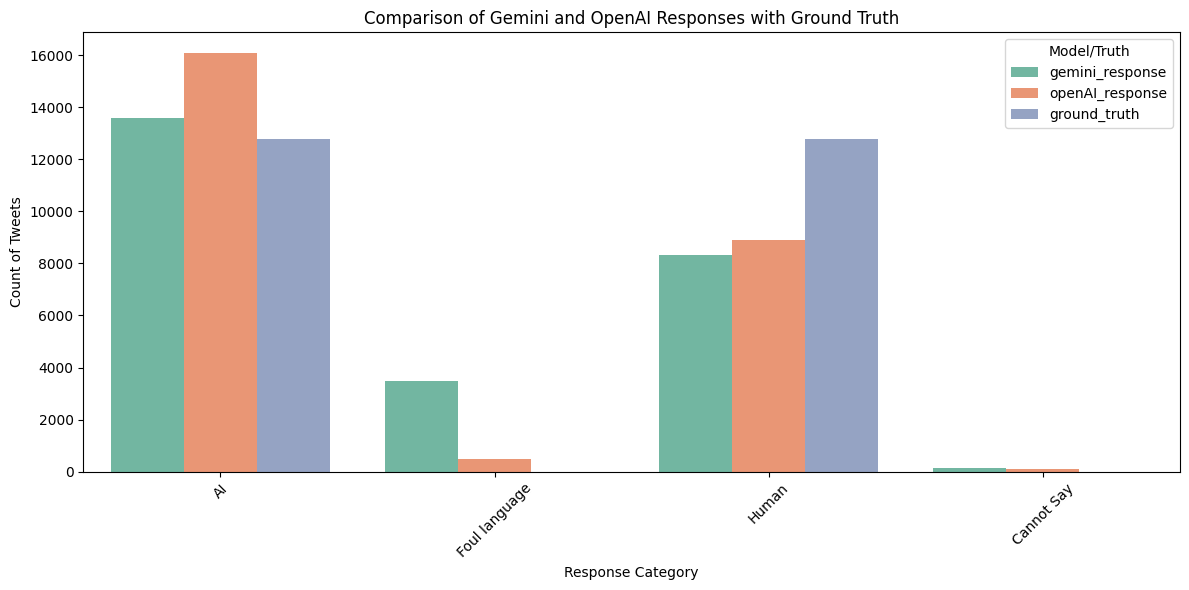

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert account.type to categorical labels for visualization
data_df['ground_truth'] = data_df['account.type'].map({0: 'Human', 1: 'AI'})

# Prepare data for comparison visualization
comparison_data = data_df[['gemini_response', 'openAI_response', 'ground_truth']].melt(var_name='Model', value_name='Label')

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='Label', hue='Model', data=comparison_data, palette='Set2')
plt.title('Comparison of Gemini and OpenAI Responses with Ground Truth')
plt.ylabel('Count of Tweets')
plt.xlabel('Response Category')
plt.legend(title='Model/Truth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('comparison_ground_truth.png')
plt.show()



Calculate the accuracy of each model compared to the ground truth and visualize it using a bar chart.

<ipython-input-10-3fadac8890d2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=accuracy_data_refined, palette='coolwarm')


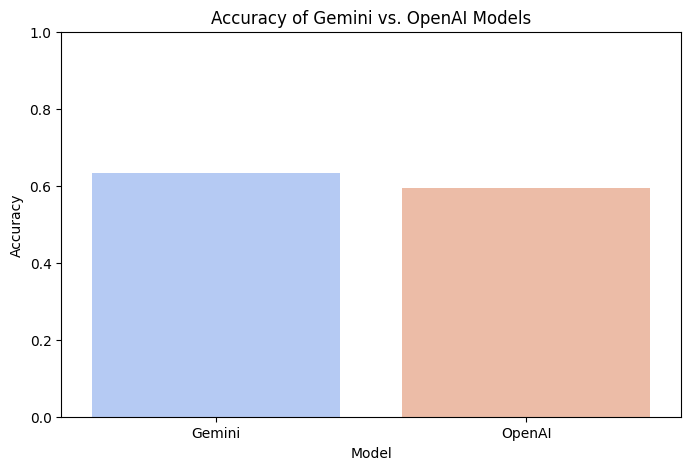

(None,
     Model  Accuracy
 0  Gemini  0.632813
 1  OpenAI  0.594860)

In [ ]:
# Filter the dataset to include only rows where the model responses are 'Human' or 'AI'
filtered_data_for_accuracy = data_df[(data_df['gemini_response'].isin(['Human', 'AI'])) & (data_df['openAI_response'].isin(['Human', 'AI']))]

# Calculate accuracy again with this filtered dataset
gemini_accuracy_refined = accuracy_score(filtered_data_for_accuracy['ground_truth'], filtered_data_for_accuracy['gemini_response'])
openai_accuracy_refined = accuracy_score(filtered_data_for_accuracy['ground_truth'], filtered_data_for_accuracy['openAI_response'])

# Create a DataFrame for plotting refined accuracies
accuracy_data_refined = pd.DataFrame({
    'Model': ['Gemini', 'OpenAI'],
    'Accuracy': [gemini_accuracy_refined, openai_accuracy_refined]
})

# Plotting the refined accuracies
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=accuracy_data_refined, palette='coolwarm')
plt.title('Accuracy of Gemini vs. OpenAI Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the limit for better visualization of differences
plt.savefig('Accuracy_Gemini_OpenAI.png')
plt.show(), accuracy_data_refined


Use pie charts to show the distribution of categories as labeled by each model.

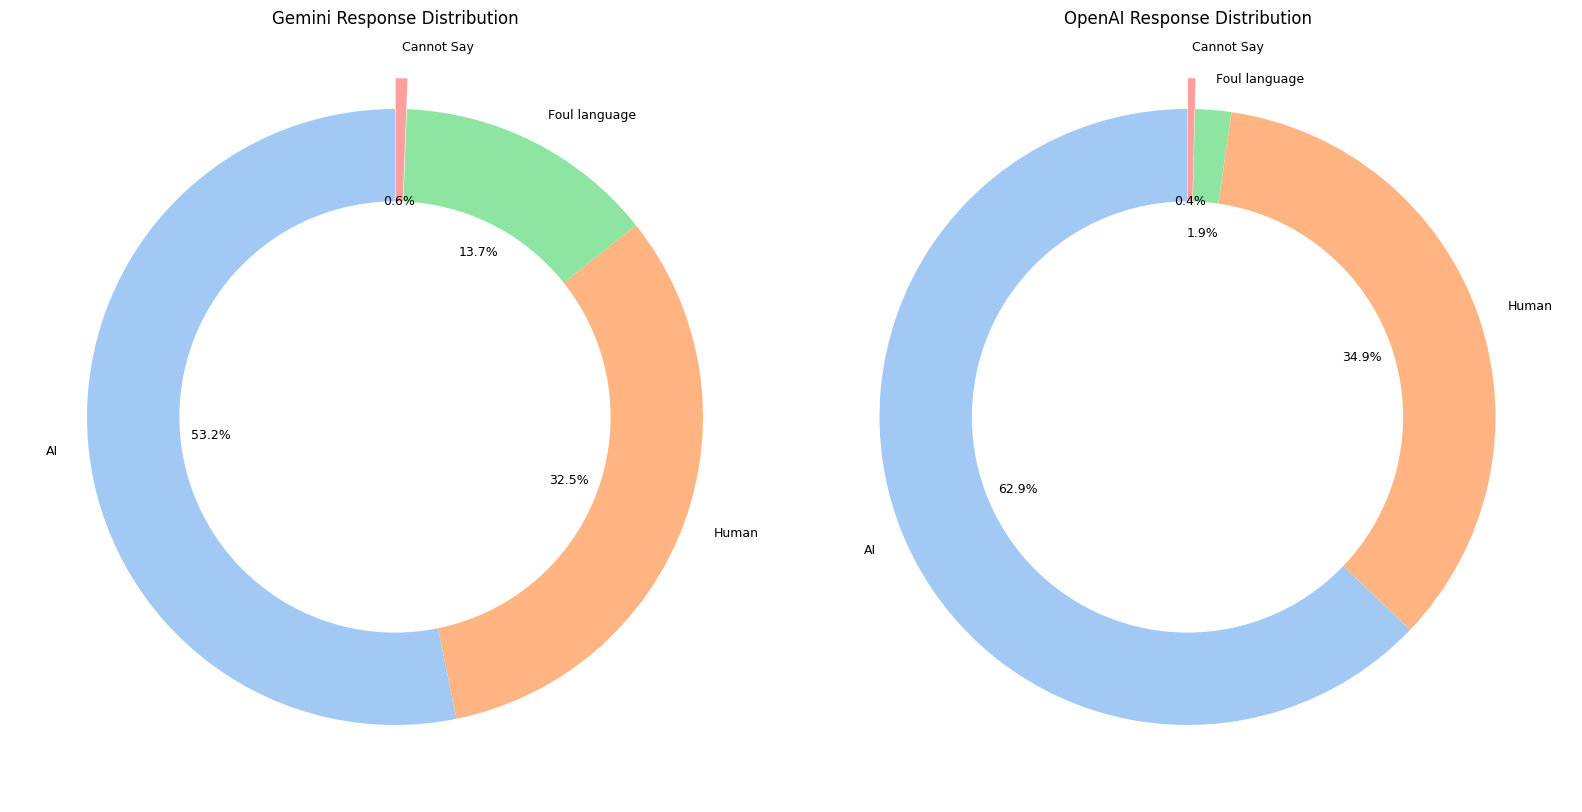

In [ ]:
# Prepare data for pie charts
gemini_counts = data_df['gemini_response'].value_counts()
openai_counts = data_df['openAI_response'].value_counts()

# Define the function to apply the improvements for pie chart visualization, correctly adjusting text properties
def improve_pie_chart(ax, counts, title):
    # Calculate explode values: explode the smallest category
    explode_values = [0.1 if count == counts.min() else 0 for count in counts]
    # Plotting the pie chart with improvements
    wedges, texts, autotexts = ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, explode=explode_values,
                                      textprops={'fontsize': 9}, colors=sns.color_palette('pastel'))
    # Improve text placement by adjusting fontsize of autotexts
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(9)
    # Draw a circle at the center to make it a donut
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(centre_circle)
    # Set title
    ax.set_title(title)

# Re-plotting with improvements
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Gemini Pie Chart with improvements
improve_pie_chart(ax[0], gemini_counts, 'Gemini Response Distribution')

# OpenAI Pie Chart with improvements
improve_pie_chart(ax[1], openai_counts, 'OpenAI Response Distribution')

plt.tight_layout()
plt.savefig('Distribution.png', bbox_inches='tight')
plt.show()


Generate confusion matrices for each model against the ground truth.

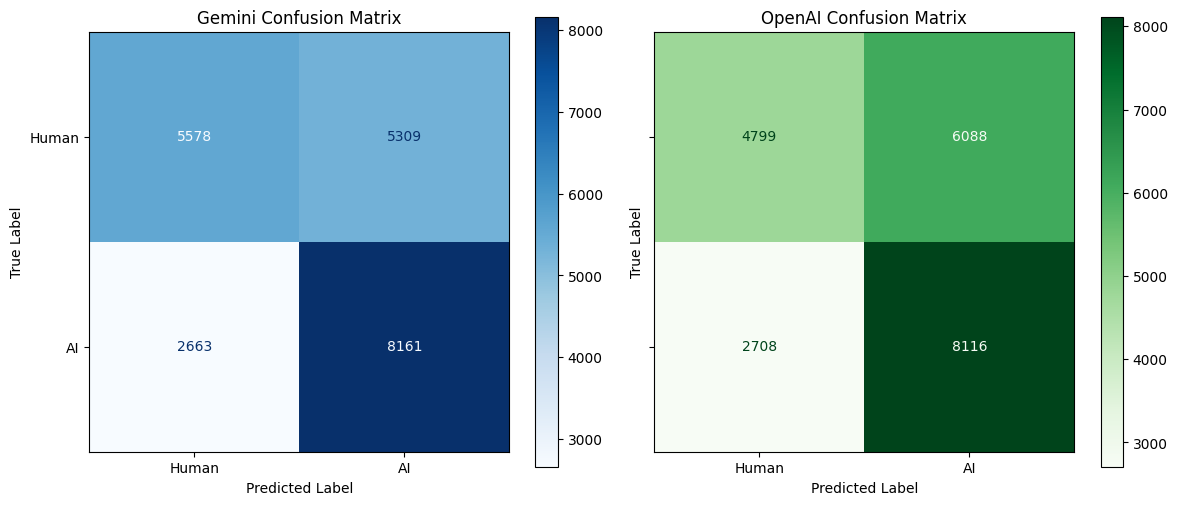

In [ ]:
# Filter the dataset for responses where both Gemini and OpenAI labeled as 'Human' or 'AI'
binary_filtered_data = data_df[(data_df['gemini_response'].isin(['Human', 'AI'])) & (data_df['openAI_response'].isin(['Human', 'AI']))]

# Calculate confusion matrices for the filtered dataset
binary_gemini_cm = confusion_matrix(binary_filtered_data['ground_truth'], binary_filtered_data['gemini_response'], labels=['Human', 'AI'])
binary_openai_cm = confusion_matrix(binary_filtered_data['ground_truth'], binary_filtered_data['openAI_response'], labels=['Human', 'AI'])

# Plotting the refined confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Gemini Confusion Matrix
ConfusionMatrixDisplay(binary_gemini_cm, display_labels=['Human', 'AI']).plot(cmap='Blues', ax=ax[0], values_format='g')
ax[0].set_title('Gemini Confusion Matrix')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

# OpenAI Confusion Matrix
ConfusionMatrixDisplay(binary_openai_cm, display_labels=['Human', 'AI']).plot(cmap='Greens', ax=ax[1], values_format='g')
ax[1].set_title('OpenAI Confusion Matrix')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


Stacked Bar Plot

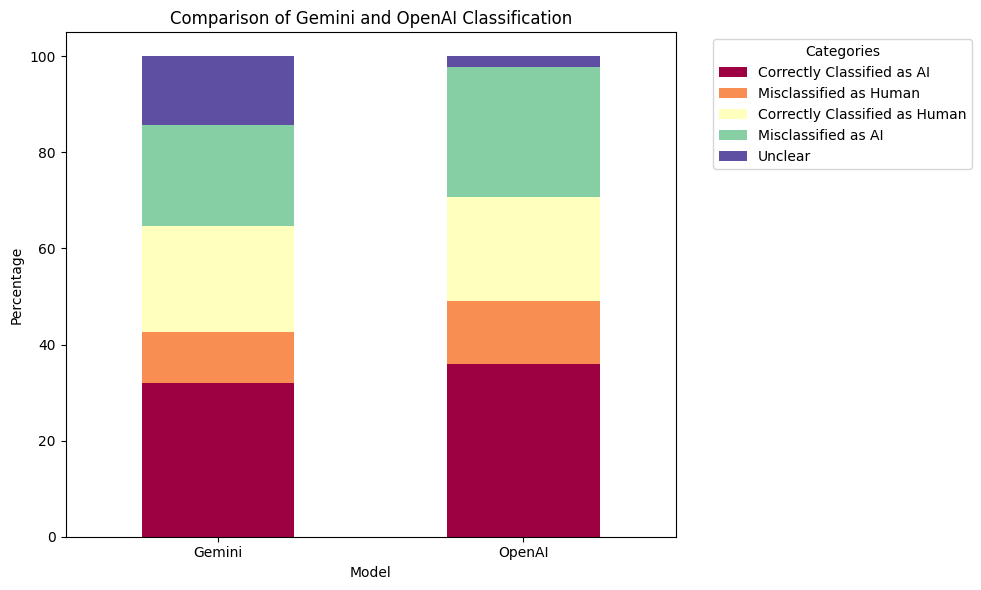

In [ ]:
# Create a mapping for recoding responses to match the stacked bar categories
recode_mapping = {
    'Human': 'Correctly Classified as Human',
    'AI': 'Correctly Classified as AI',
    'Foul language': 'Unclear',
    'Cannot Say': 'Unclear'
}

# Recode the responses using the mapping
data_df['gemini_category'] = data_df['gemini_response'].map(recode_mapping)
data_df['openAI_category'] = data_df['openAI_response'].map(recode_mapping)

# For incorrect classifications:
# If ground truth is 'AI' and response is 'Human', it's 'Misclassified as Human'.
# If ground truth is 'Human' and response is 'AI', it's 'Misclassified as AI'.
data_df.loc[(data_df['ground_truth'] == 'AI') & (data_df['gemini_category'] == 'Correctly Classified as Human'), 'gemini_category'] = 'Misclassified as Human'
data_df.loc[(data_df['ground_truth'] == 'Human') & (data_df['gemini_category'] == 'Correctly Classified as AI'), 'gemini_category'] = 'Misclassified as AI'
data_df.loc[(data_df['ground_truth'] == 'AI') & (data_df['openAI_category'] == 'Correctly Classified as Human'), 'openAI_category'] = 'Misclassified as Human'
data_df.loc[(data_df['ground_truth'] == 'Human') & (data_df['openAI_category'] == 'Correctly Classified as AI'), 'openAI_category'] = 'Misclassified as AI'

# Now calculate the counts for each category
gemini_counts = data_df['gemini_category'].value_counts(normalize=True) * 100
openai_counts = data_df['openAI_category'].value_counts(normalize=True) * 100

# Prepare the data for stacked bar plot
stacked_data = pd.DataFrame({
    'Gemini': gemini_counts,
    'OpenAI': openai_counts
}).fillna(0)  # Fill NaN values with 0

# Order the rows to match the order of categories in the example plot
ordered_categories = [
    'Correctly Classified as AI',
    'Misclassified as Human',
    'Correctly Classified as Human',
    'Misclassified as AI',
    'Unclear'
]
stacked_data = stacked_data.reindex(ordered_categories)

stacked_data.T.plot(kind='bar', stacked=True, colormap='Spectral', figsize=(10, 6))

# Adding details to the plot
plt.title('Comparison of Gemini and OpenAI Classification')
plt.xlabel('Model')
plt.ylabel('Percentage')
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Keep the model names horizontal for readability
plt.tight_layout()
plt.show()


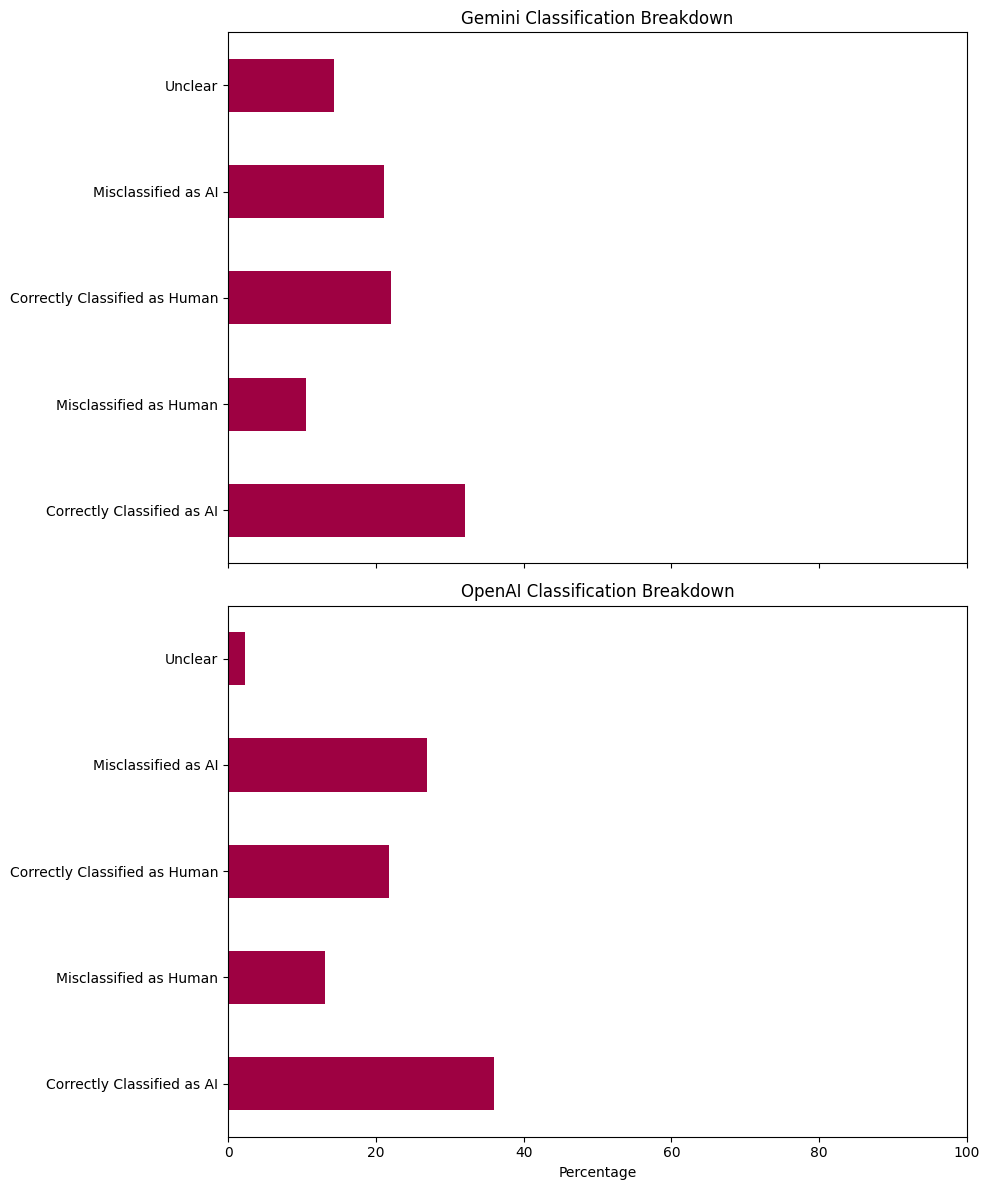

In [ ]:
# We need to create a DataFrame where each row corresponds to a category and each column corresponds to a model
# Then, each cell in the DataFrame will be the percentage of tweets in that category for that model.

# Create a DataFrame with zeros for each category-model combination
categories = ['Correctly Classified as AI', 'Misclassified as Human',
              'Correctly Classified as Human', 'Misclassified as AI', 'Unclear']
models = ['Gemini', 'OpenAI']

# Initialize the DataFrame with zeros
stacked_individual_df = pd.DataFrame(0, index=categories, columns=models)

# Fill in the DataFrame with the actual counts
for category in categories:
    for model in models:
        if model == 'Gemini':
            stacked_individual_df.at[category, model] = data_df[data_df['gemini_category'] == category].shape[0]
        else:
            stacked_individual_df.at[category, model] = data_df[data_df['openAI_category'] == category].shape[0]

# Convert counts to percentages
stacked_individual_df = stacked_individual_df.div(stacked_individual_df.sum(axis=0), axis=1) * 100

# Now let's plot the individual stacked bars for each model
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

for ax, model in zip(axs, models):
    stacked_individual_df[model].plot(kind='barh', stacked=True, ax=ax, colormap='Spectral')
    ax.set_title(f'{model} Classification Breakdown')
    ax.set_xlabel('Percentage')
    ax.set_xlim(0, 100)  # Ensure the x-axis ranges from 0 to 100 for percentages

plt.tight_layout()

plt.show()


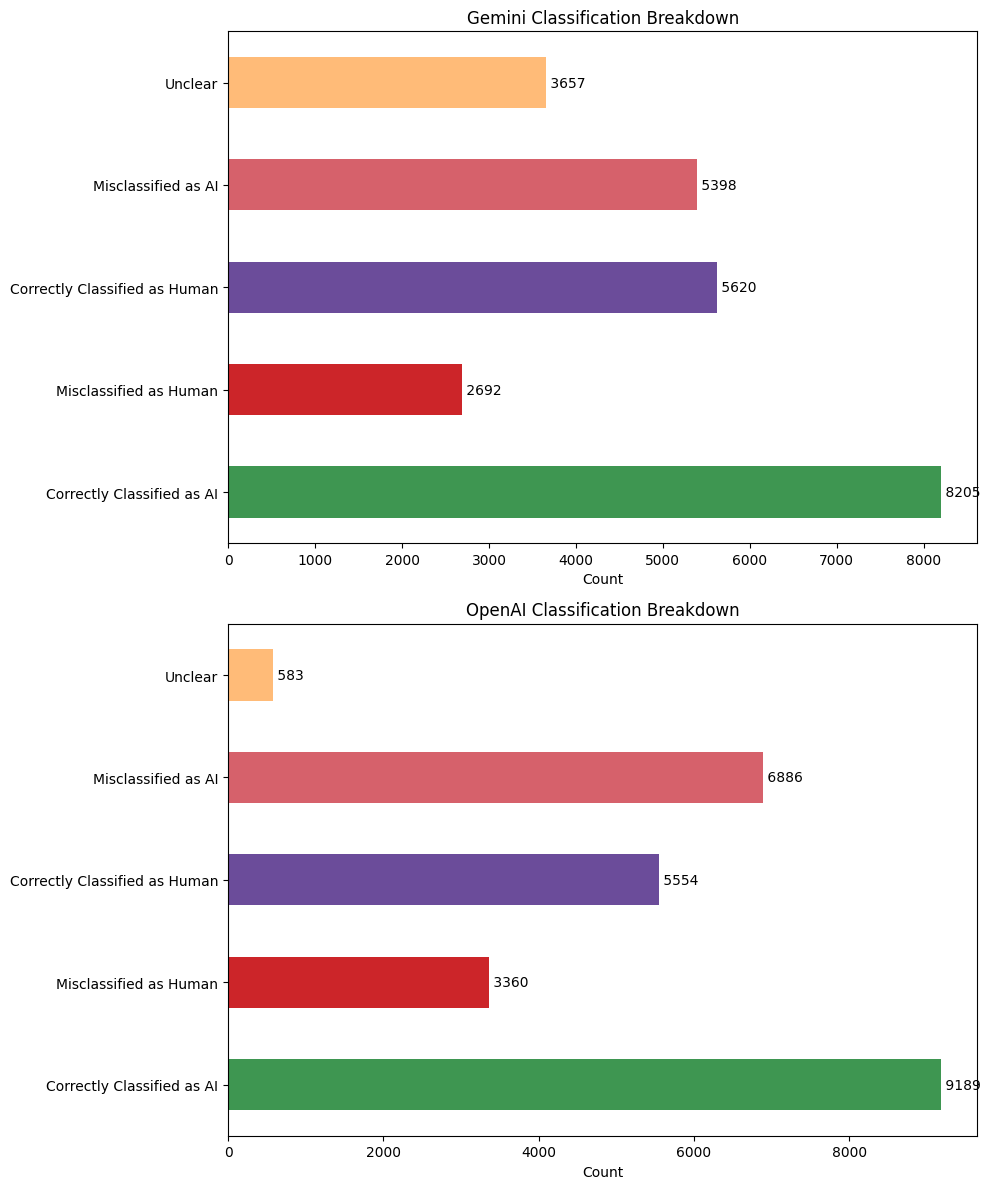

In [ ]:
# We will directly calculate the counts for each category for both Gemini and OpenAI
gemini_counts_actual = data_df['gemini_category'].value_counts().reindex(categories).fillna(0).astype(int)
openai_counts_actual = data_df['openAI_category'].value_counts().reindex(categories).fillna(0).astype(int)

# Prepare the data for the stacked bar plot with actual counts
stacked_counts = pd.DataFrame({
    'Gemini': gemini_counts_actual,
    'OpenAI': openai_counts_actual
})

# Now plot the actual counts as individual stacked bars for each model
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharey=True)

for ax, (model, counts) in zip(axs, stacked_counts.items()):
    # Plot the bars horizontally
    bars = counts.plot(kind='barh', stacked=True, ax=ax, color=['#3e9651', '#cc2529', '#6b4c9a', '#d6616b', '#ffbb78'])
    ax.set_title(f'{model} Classification Breakdown')
    ax.set_xlabel('Count')

    # Annotate the count on the bars
    for i, value in enumerate(counts):
        ax.text(value, i, f' {value}', va='center', ha='left')

plt.tight_layout()
plt.savefig('Classifiaction_breakdown.png', bbox_inches='tight')
plt.show()
